In [509]:
import cv2
import numpy as np
import noise
import matplotlib.pyplot as plt

In [510]:
width, height = 128, 128
scale = 100.0  # Adjust the scale to control the noise frequency

# Set the margin size
margin = 10  # Adjust the margin size as desired

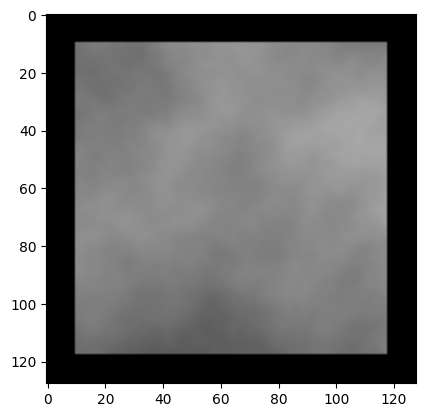

In [511]:
# randomize the noise every time
x_offset = np.random.randint(0, 1000)
y_offset = np.random.randint(0, 1000)

canvas = np.zeros((height, width), dtype=np.uint8)
for y in range(margin, height - margin):
    for x in range(margin, width - margin):
        value = noise.pnoise2(x/scale + x_offset, y/scale + y_offset, octaves=6, persistence=0.5, lacunarity=2.0, repeatx=width, repeaty=height, base=0)
        canvas[y, x] = int((value + 1) * 127.5)  # Scale the noise value to the 0-255 range

# create image from array
img = cv2.cvtColor(canvas, cv2.COLOR_GRAY2BGR)
plt.imshow(img)
plt.show()

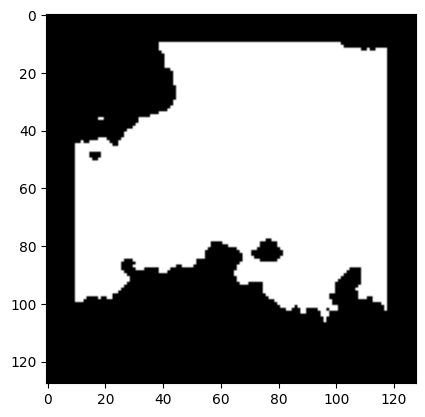

In [512]:
threshold = 127  # Adjust the threshold to control the amount of black and white
canvas = cv2.threshold(canvas, threshold, 255, cv2.THRESH_BINARY)[1]

# create image from array
img = cv2.cvtColor(canvas, cv2.COLOR_GRAY2BGR)
plt.imshow(img)
plt.show()